# 判別分析法

In [2]:
# Google　Colaboratory で実行する場合はインストールする
if "google.colab" in str(get_ipython()):
    !pip install japanize_matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# 乱数
np.random.seed(777)

# サンプル用データの作成

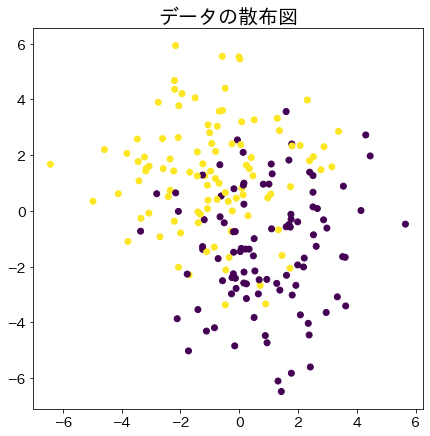

In [5]:
n_samples = 200
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=2)
X[:, 0] -= np.mean(X[:, 0])
X[:, 1] -= np.mean(X[:, 1])

fig = plt.figure(figsize=(7, 7))
plt.title("データの散布図", fontsize=20)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# 線形判別分析法で決定境界を求める

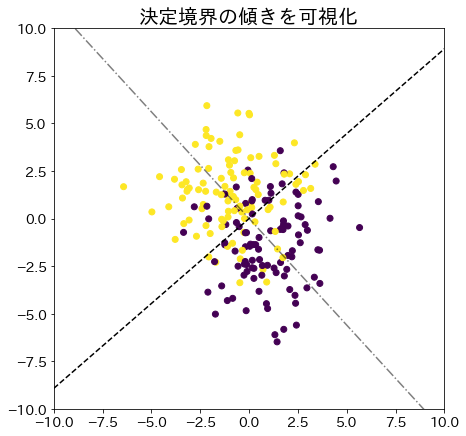

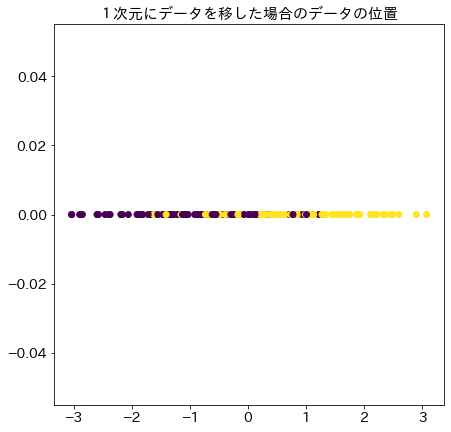

In [6]:
# 決定境界を求める
clf = LinearDiscriminantAnalysis(store_covariance=True)
clf.fit(X, y)

# どのような決定境界が引かれたかを確認する
w = clf.coef_[0]
wt = -1 / (w[1] / w[0])  # wに垂直な傾きを求める
xs = np.linspace(-10, 10, 100)
ys_w = [(w[1] / w[0]) * xi for xi in xs]
ys_wt = [wt * xi for xi in xs]

fig = plt.figure(figsize=(7, 7))
plt.title("決定境界の傾きを可視化", fontsize=20)
plt.scatter(X[:, 0], X[:, 1], c=y)  # サンプルデータ
plt.plot(xs, ys_w, "-.", color="k", alpha=0.5)  # ｗの向き
plt.plot(xs, ys_wt, "--", color="k")  # ｗに垂直な向き

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

# 求めたベクトルｗを元に１次元にデータを移した結果
X_1d = clf.transform(X).reshape(1, -1)[0]
fig = plt.figure(figsize=(7, 7))
plt.title("１次元にデータを移した場合のデータの位置", fontsize=15)
plt.scatter(X_1d, [0 for _ in range(n_samples)], c=y)
plt.show()

# 2次元以上のデータでの例

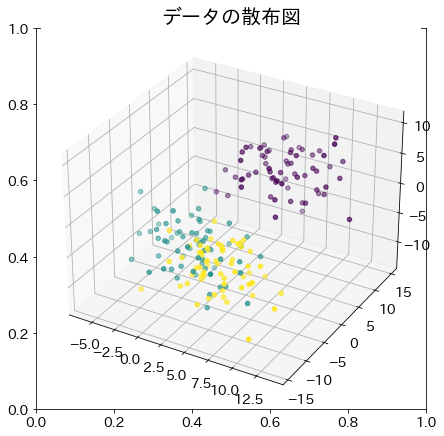

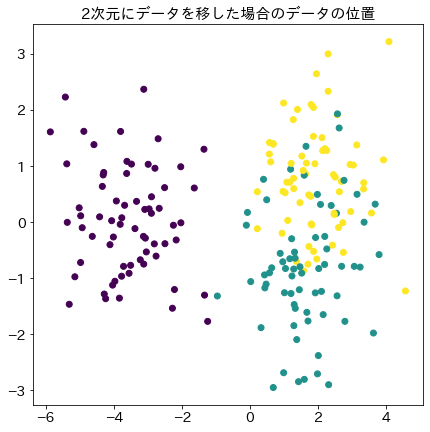

In [7]:
X_3d, y_3d = make_blobs(n_samples=200, centers=3, n_features=3, cluster_std=3)

# サンプルデータの分布
fig = plt.figure(figsize=(7, 7))
plt.title("データの散布図", fontsize=20)
ax = fig.add_subplot(projection="3d")
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_3d)
plt.show()

# 線形判別分析を適用
clf_3d = LinearDiscriminantAnalysis()
clf_3d.fit(X_3d, y_3d)
X_2d = clf_3d.transform(X_3d)

# 判別分析で次元削減した結果
fig = plt.figure(figsize=(7, 7))

plt.title("2次元にデータを移した場合のデータの位置", fontsize=15)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_3d)
plt.show()